<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Optimizing_product_prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Vendor_Data.csv')
data.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906
1,Product 2,37,27,10.0,0.8,0.00106,0.01991
2,Product 3,34,26,8.5,0.6,0.00328,0.03778
3,Product 4,32,30,2.8,0.7,0.00000,0.08562
4,Product 5,62,45,16.0,1.0,0.00079,0.02637


In [3]:
data.shape

(250, 7)

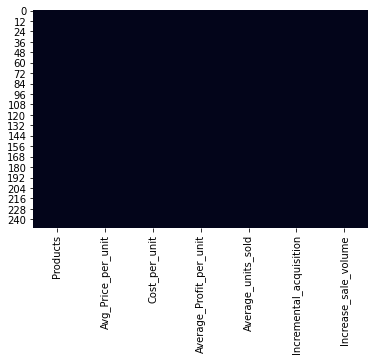

In [5]:
sns.heatmap(data.isnull(),cbar=False)

In [12]:
data.describe()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,60.620000,51.596000,9.034400,1.500400,0.001366,0.050986
std,28.318959,24.182223,7.433913,0.839511,0.001579,0.029084
min,10.000000,9.000000,0.000000,0.100000,0.000000,0.000370
25%,37.000000,32.000000,3.100000,0.800000,0.000000,0.025528
50%,57.000000,50.500000,7.150000,1.400000,0.000690,0.051620
75%,85.750000,71.750000,12.975000,2.200000,0.002560,0.076580
max,110.000000,105.000000,29.700000,3.100000,0.006150,0.099430


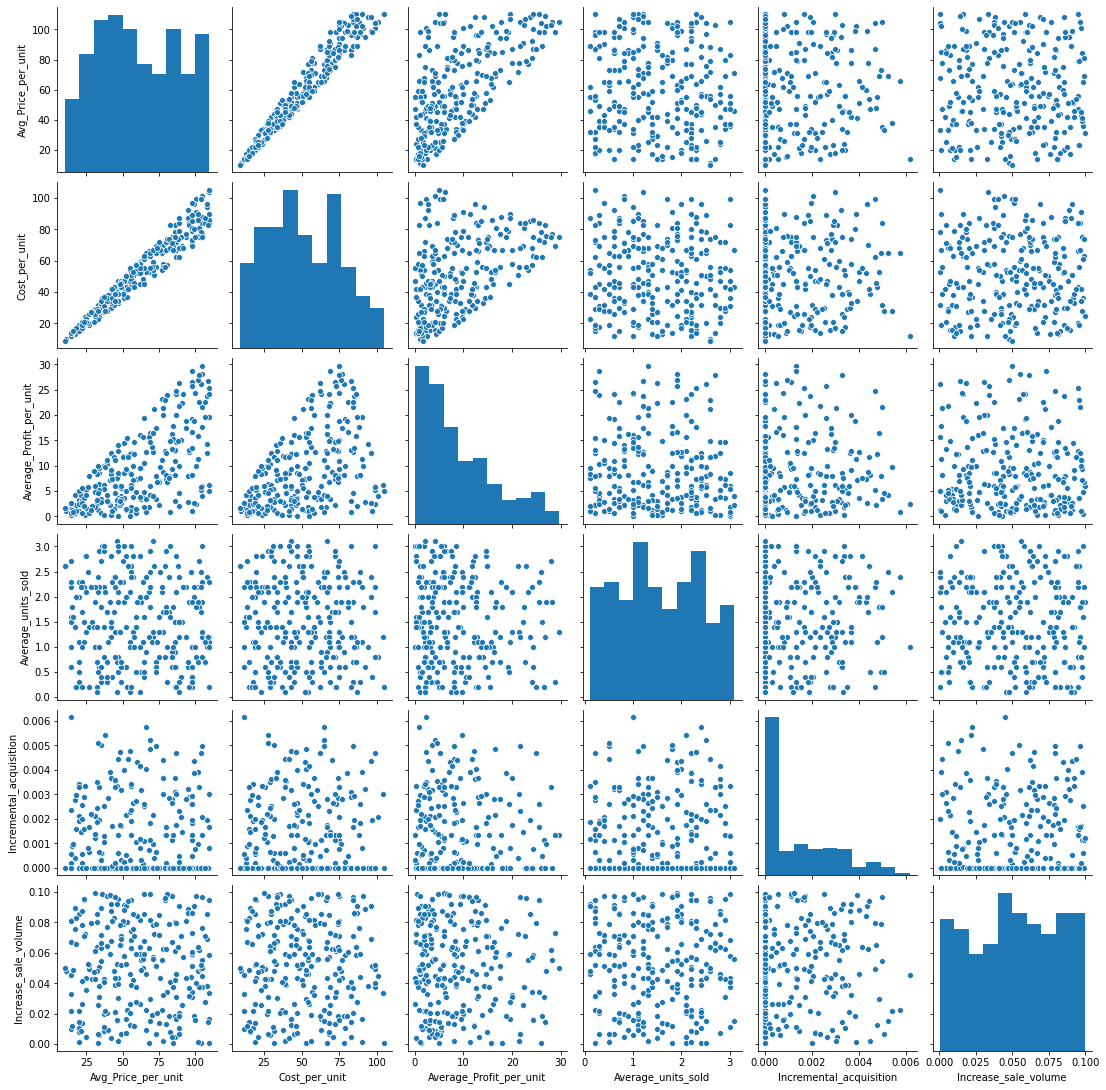

In [11]:
sns.pairplot(data)

In [26]:
data.drop(['Products'],axis=1,inplace=True)

In [27]:
data

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,95,92,2.8,0.6,0.00323,0.08906
1,37,27,10.0,0.8,0.00106,0.01991
2,34,26,8.5,0.6,0.00328,0.03778
3,32,30,2.8,0.7,0.00000,0.08562
4,62,45,16.0,1.0,0.00079,0.02637
...,...,...,...,...,...,...
245,23,21,2.0,1.5,0.00290,0.07129
246,59,57,1.5,0.5,0.00000,0.05905
247,16,15,0.9,1.6,0.00095,0.04835
248,84,71,13.2,0.8,0.00264,0.00473


In [81]:
X=data.drop(['Increase_sale_volume','Average_Profit_per_unit'],axis=1)
y=data.Increase_sale_volume
y = pd.factorize(data['Increase_sale_volume'])[0].reshape(-1, 1)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [83]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
pred=model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
print('RMSE',np.sqrt(mse))

RMSE 78.95791443891073


In [86]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=100)
model1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [87]:
pred1=model1.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred1)
print('RMSE',np.sqrt(mse))
print('result',model1.score(X_train,y_train))

RMSE 85.72200894363905
result 0.8405967218286177


In [89]:
from sklearn.svm import SVR
vect=SVR()
vect.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:
pred2=vect.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred2)
print('RMSE',np.sqrt(mse))

RMSE 75.00231997596451
